## Exploring SynD with NILMTK

In this tutorial, we will use NILMTK to load and explore SynD!

In [1]:
from nilmtk import DataSet

SynD = DataSet('/Users/christoph/datasets/SynD-release/SynD.h5')

SynD.metadata

{'contact': 'klemenjak@ieee.org',
 'creators': ['Klemenjak, Christoph',
  'Kovatsch, Christoph',
  'Herold, Manuel',
  'Elmenreich, Wilfried'],
 'dataset_ID': 1,
 'date_created': '2019-09-29',
 'description': 'an energy consumption dataset created from synthetic power signals',
 'duration': 180,
 'geo_location': {'country': 'AT',
  'latitude': 46.6247222,
  'locality': 'Klagenfurt',
  'longitude': 14.3052778},
 'institution': 'University of Klagenfurt',
 'long_name': 'SynD - A Synthetic Energy Consumption Dataset for Non-Intrusive Load Monitoring in Residential Buildings',
 'name': 'SynD',
 'number_of_buildings': 1,
 'publication_date': 2019,
 'related_documents': ['http://github.com/klemenjak/synd/'],
 'sampling_interval': 0.2,
 'schema': 'https://github.com/nilmtk/nilm_metadata/tree/v0.2',
 'subject': 'SynD - A Synthetic Energy Dataset for Load Disaggregation Scholarship',
 'timezone': 'Europe/Vienna',
 'meter_devices': {'HMC8015': {'description': 'Power analyzer',
   'manufacturer':

The *elec object* is a key element in NILMTK.

In [2]:
elec = SynD.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='SynD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='SynD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, building=1, dataset='SynD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='SynD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=5, building=1, dataset='SynD', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=6, building=1, dataset='SynD', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=7, building=1, dataset='SynD', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=8, building=1, dataset='SynD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=9, building=1, dataset='SynD', appliances=[Appliance(type='clothes iron', instance=1)])
  ElecMeter(instance=10, building=1, datas

We can use the *elec* object to obtain basic information on SynD's household.

In [3]:
print("SynD comes with a Sample Period of: " + str( elec.sample_period() ))
print("Available physical quantities: " + str( elec.available_physical_quantities() ))
print("Available AC types :" + str(elec.available_ac_types('power')))
print("Number of days: "+ str(elec.uptime()))

SynD comes with a Sample Period of: 0.2
Available physical quantities: ['power']
Available AC types :['active']
Number of days: 179 days 23:59:59.400000


The *wiring graph* reveals how the power grid inside the household looks like.

(<networkx.classes.digraph.DiGraph at 0x123d72940>,
 <matplotlib.axes._axes.Axes at 0x123d7b748>)

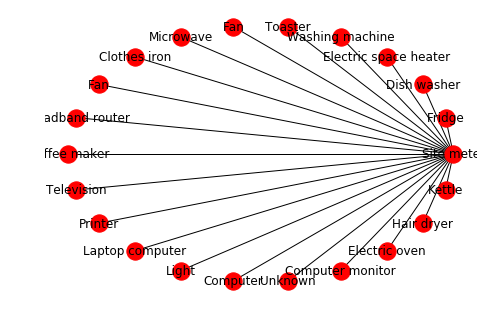

In [4]:
elec.draw_wiring_graph()

Since SynD is synthetic, we have knowledge about all components of the aggregate signal!


In [8]:
round(elec.proportion_of_energy_submetered(), 2)

Running MeterGroup.proportion_of_energy_submetered...


1.0

Finally, we explore how much consumption per appliance we have in SynD:

In [9]:
elec.submeters().fraction_per_meter()

21/21 ElecMeter(instance=22, building=1, dataset='SynD', appliances=[Appliance(type='kettle', instance=1)])1)]))]))]))])

(2, 1, SynD)     0.073865
(3, 1, SynD)     0.115977
(4, 1, SynD)     0.348956
(5, 1, SynD)     0.104910
(6, 1, SynD)     0.003695
(7, 1, SynD)     0.008397
(8, 1, SynD)     0.004937
(9, 1, SynD)     0.183080
(10, 1, SynD)    0.008172
(11, 1, SynD)    0.015761
(12, 1, SynD)    0.001748
(13, 1, SynD)    0.055371
(14, 1, SynD)    0.000339
(15, 1, SynD)    0.002415
(16, 1, SynD)    0.000274
(17, 1, SynD)    0.013942
(18, 1, SynD)    0.000114
(19, 1, SynD)    0.002901
(20, 1, SynD)    0.013366
(21, 1, SynD)    0.022287
(22, 1, SynD)    0.019496
dtype: float64

This tutorial should give you basic code fragments to start working with NILMTK. May the elec object be with you!

best, 

Christoph
